In [1]:
import numpy as np

from config import Config as config
from text_features import TextFeatures, create_nn_features
from preprocessing import DataPreparation, filter_df, get_cummulative
from train_model import train_lgb_regressor
from train_model import train_catboost_regressor

Using TensorFlow backend.


In [2]:
dp = DataPreparation()
dp.prepare_train_data()
dp.add_cat_and_geo_features()
dp.add_CPV_features()
dp.add_numerical_features()
dp.add_date_features()
dp.add_complaints_features()
dp.add_org_features()

garbage/missing %: 0.02
garbage/missing %: 0.02


/home/dima/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1030: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


In [3]:
data, test = dp.get_train_test_data()
data = filter_df(data)

In [4]:
tf = TextFeatures(data, test)
tf.create_text_features()
tf.get_text_features()
create_nn_features(tf.train_df, tf.test_df)
del tf

Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
 - 12s - loss: 0.8407
Epoch 1/1
 - 12s - loss: 0.8377
Epoch 1/1
 - 12s - loss: 0.8403
Epoch 1/1
 - 12s - loss: 0.8408
Epoch 1/1
 - 7s - loss: 0.6692
Epoch 1/1
 - 8s - loss: 0.6734
Epoch 1/1
 - 8s - loss: 0.6782
Epoch 1/1
 - 8s - loss: 0.6653
Epoch 1/1
 - 6s - loss: 0.5178
 - 6s - loss: 0.5076
 - 6s - loss: 0.5108
 - 6s - loss: 0.5060
Valid RMSLE: 0.3340
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
 - 12s - loss: 0.8415
Epoch 1/1
 - 12s - loss: 0.8403
Epoch 1/1
 - 13s - loss: 0.8407
Epoch 1/1
 - 13s - loss: 0.8416
Epoch 1/1
 - 8s - loss: 0.6700
Epoch 1/1
 - 8s - loss: 0.6797
Epoch 1/1
 - 8s - loss: 0.6645
Epoch 1/1
 - 8s - loss: 0.6819
Epoch 1/1
 - 6s - loss: 0.5136
 - 6s - loss: 0.5179
 - 6s - loss: 0.5173
 - 6s - loss: 0.5031
Valid RMSLE: 0.3333
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
 - 12s - loss: 0.8370
Epoch 1/1
 - 12s - loss: 0.8395
Epoch 1/1
 - 12s - loss: 0.8392
Epoch 1/1
 - 12s - loss: 0.8358
Epoch 1/1
 - 8s - loss: 0.6733
Epoch 1/1
 - 8s - l

In [6]:
train = data[data.train_val == 'train']
val = data[data.train_val == 'val']

In [7]:
for feat in config.cummulative:
    train, val, df_test = get_cummulative(train, val, test, feat, df_calc=train)

In [10]:
x_train = train[config.features]
x_test = val[config.features]
y_train = np.log1p(train['counts'])
y_test = np.log1p(val['counts'])

In [12]:
lgb_model = train_lgb_regressor(x_train, x_test, y_train, y_test)

[1]	training's rmse: 0.377182	valid_1's rmse: 0.358156
Training until validation scores don't improve for 40 rounds.
[2]	training's rmse: 0.369937	valid_1's rmse: 0.350793
[3]	training's rmse: 0.363514	valid_1's rmse: 0.344332
[4]	training's rmse: 0.357922	valid_1's rmse: 0.338619
[5]	training's rmse: 0.35297	valid_1's rmse: 0.333711
[6]	training's rmse: 0.348661	valid_1's rmse: 0.329492
[7]	training's rmse: 0.34503	valid_1's rmse: 0.326011
[8]	training's rmse: 0.341665	valid_1's rmse: 0.322792
[9]	training's rmse: 0.338732	valid_1's rmse: 0.319962
[10]	training's rmse: 0.336142	valid_1's rmse: 0.317542
[11]	training's rmse: 0.333884	valid_1's rmse: 0.315438
[12]	training's rmse: 0.331914	valid_1's rmse: 0.313624
[13]	training's rmse: 0.33017	valid_1's rmse: 0.312086
[14]	training's rmse: 0.328615	valid_1's rmse: 0.310758
[15]	training's rmse: 0.327302	valid_1's rmse: 0.309598
[16]	training's rmse: 0.326125	valid_1's rmse: 0.308644
[17]	training's rmse: 0.325039	valid_1's rmse: 0.30780

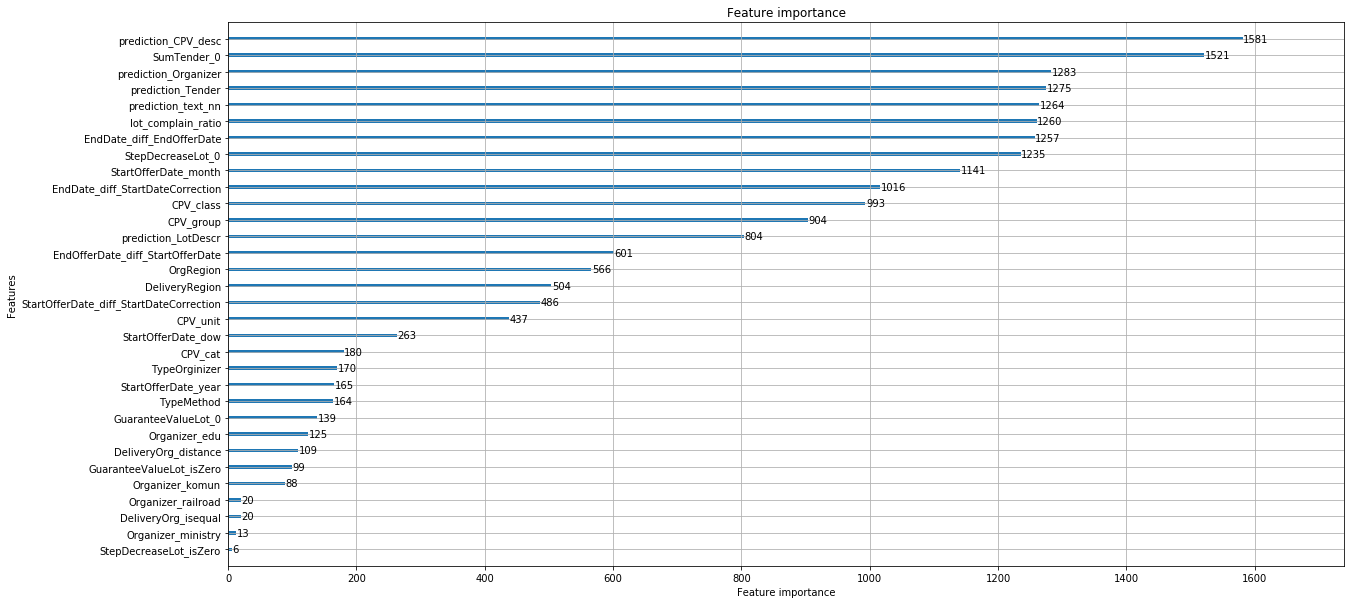

In [13]:
import lightgbm as lgb
%matplotlib inline
lgb.plot_importance(lgb_model, figsize=(20, 10))